Based on this example: https://github.com/micappe/ppxf_examples/blob/main/ppxf_example_population_photometry.ipynb

In [2]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import path

from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util
import ppxf.miles_util as lib

ppxf_dir = path.dirname(path.realpath(lib.__file__))

In [31]:
file = "/Users/mitchell/offcenter_blackholes/data/spec-at2018bsi-host-sdss.fits"
hdu = fits.open(file)
t = hdu[1].data
spec_meta = Table(hdu[2].data)
z = spec_meta['Z'].value[0]
tde_info = Table.read(file, hdu=1)

In [32]:
tde_info

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
11.579388,3.5518,0.06664483,0,205520896,1.3881465,11.032989,11.970299
11.672122,3.5519,0.0,0,205520896,1.3913608,10.034883,11.882823
11.764823,3.552,0.17657176,0,67108864,1.391772,10.03673,11.822939
9.968305,3.5521,0.19721588,0,67108864,1.3906612,9.644577,11.720858
7.9081964,3.5522,0.21488994,0,67108864,1.3904653,9.213051,11.68229
7.6717715,3.5523,0.23644818,0,67108864,1.3910186,9.066986,11.749537
8.774834,3.5524,0.24325718,0,0,1.3898807,8.71358,11.914837
9.796442,3.5525,0.23826803,0,0,1.3894504,8.80366,12.180039
10.342739,3.5526,0.23219198,0,0,1.3889034,8.805332,12.419239


In [33]:
flux = t['flux']
galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
wave = 10**t['loglam']
#noise = 1/t['ivar']
# temporary
noise = np.ones_like(galaxy)

In [35]:
wave *= np.median(util.vac_to_air(wave)/wave)
rms = 0.019  # rms scatter of the spectrum residuals ??
goodpixels = goodpixels = np.arange(galaxy.size)  # fit full spectrum

In [36]:
wave_good = wave[goodpixels]
lam_range_gal = np.array([np.min(wave_good), np.max(wave_good)])/(1 + z)

In [38]:
c = 299792.458  # speed of light in km/s
velscale = c*(np.diff(np.log(wave[[0, -1]]))/(wave.size - 1))[0]
FWHM_gal = 2.76  # SDSS has an approximate instrumental resolution FWHM of 2.76A.

In [41]:
pathname = ppxf_dir + '/miles_models/Eun1.30*.fits'
miles = lib.miles(pathname, velscale, FWHM_gal, norm_range=[5070, 5950])

In [42]:
lam_range_gal

array([3389.0405, 9832.789 ], dtype=float32)

In [43]:
reg_dim = miles.templates.shape[1:]
stars_templates = miles.templates.reshape(miles.templates.shape[0], -1)

In [44]:
gas_templates, gas_names, line_wave = util.emission_lines(
    miles.ln_lam_temp, lam_range_gal, FWHM_gal)

Emission lines included in gas templates:
['H10' 'H9' 'H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[OII]3726'
 '[OII]3729' '[SII]6716' '[SII]6731' '[NeIII]3968' '[NeIII]3869'
 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']


In [45]:
templates = np.column_stack([stars_templates, gas_templates])

In [46]:
c = 299792.458
vel = c*np.log(1 + z)   # eq.(8) of Cappellari (2017)
start = [vel, 180.]     # (km/s), starting guess for [V, sigma]

In [47]:
n_stars = stars_templates.shape[1]
n_gas = len(gas_names)
component = [0]*n_stars + [1]*n_gas
gas_component = np.array(component) > 0  # gas_component=True for gas templates

In [48]:
moments = [2, 2]

In [49]:
start = [start, start]

In [50]:
pp = ppxf(templates, galaxy, noise, velscale, start,
          moments=moments, degree=-1, mdegree=8, lam=wave, lam_temp=miles.lam_temp, regul=1/rms,
          reg_dim=reg_dim, component=component, gas_component=gas_component, reddening=0, 
          gas_names=gas_names, goodpixels=goodpixels)

 Best Fit:       Vel     sigma
 comp.  0:     14891       139
 comp.  1:     14926       111
Stars Attenuation A_V: 2.340
chi2/DOF: 0.007699; DOF: 4614; degree = -1; mdegree = 8
method = capfit; Jac calls: 16; Func calls: 229; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 98/169
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                   H10    0.07389       2.7   14926   111
Comp:  1                    H9     0.1892       2.7   14926   111
Comp:  1                    H8     0.2242       2.7   14926   111
Comp:  1                  Heps     0.1482       3.5   14926   111
Comp:  1                Hdelta     0.4284       2.7   14926   111
Comp:  1                Hgamma     0.8176       2.7   14926   111
Comp:  1                 Hbeta      1.527       2.6   14926   111
Comp:  1                Halpha      5.498   

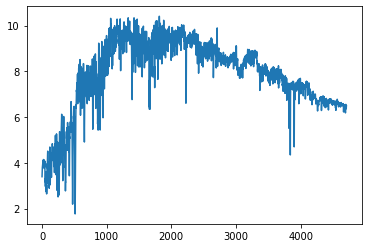

In [65]:
plt.plot(pp.templates @ pp.weights)

In [51]:
light_weights = pp.weights[~gas_component]      # Exclude weights of the gas templates
light_weights = light_weights.reshape(reg_dim)  # Reshape to (n_ages, n_metal)
light_weights /= light_weights.sum()            # Normalize to light fractions

In [52]:
miles.mean_age_metal(light_weights);

Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -0.194


In [53]:
mass_weights = light_weights/miles.flux
mass_weights /= mass_weights.sum()              # Normalize to mass fractions
miles.mass_to_light(mass_weights, band="r");

(M*/L)_r: 3.269


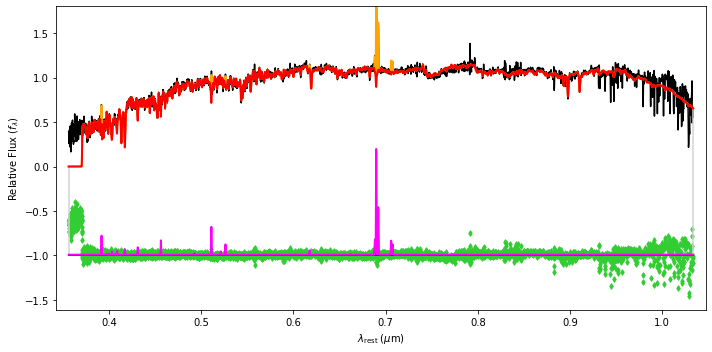

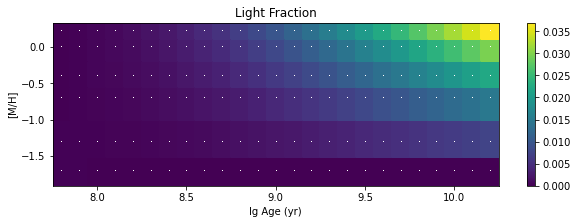

In [96]:
plt.figure(figsize=(10,5))
pp.plot(spec=True, phot=False, gas_clip=True)
plt.tight_layout()

plt.figure(figsize=(10,3))
miles.plot(light_weights)
plt.title("Light Fraction");

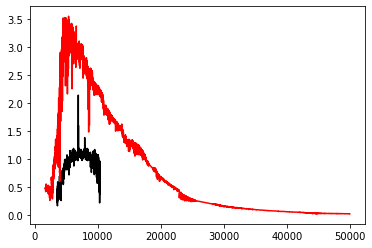

In [91]:
plt.plot(wave, galaxy, 'k')
temp_spec = templates @ pp.weights
plt.plot(miles.lam_temp, temp_spec*np.median(galaxy)/np.median(temp_spec), 'r')

In [97]:
ext_wave = miles.lam_temp

In [106]:
ext_wave

array([ 1679.94339935,  1680.33026485,  1680.71721944, ...,
       49968.17718772, 49979.68410152, 49991.19366518])

In [107]:
wave

array([ 3561.884 ,  3562.7034,  3563.525 , ..., 10329.516 , 10331.886 ,
       10334.269 ], dtype=float32)

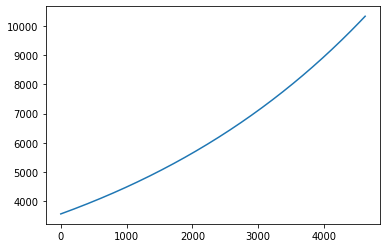

In [108]:
plt.plot(wave)

In [101]:
from numpy.polynomial import legendre
x = np.linspace(-1, 1, len(ext_wave))
mpoly = legendre.legval(x, pp.mpolyweights)

In [105]:
x = np.linspace(-1, 1, len(galaxy))
spacing = x[0]

array([0.00043234, 0.00043234, 0.00043234, ..., 0.00043234, 0.00043234,
       0.00043234])

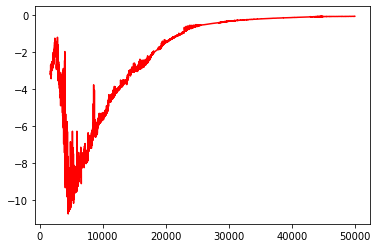

In [103]:
plt.plot(ext_wave, temp_spec*mpoly, 'r')

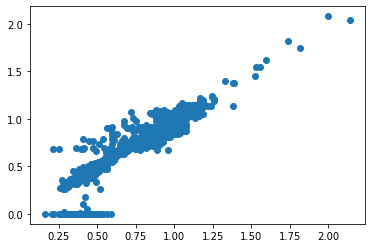

In [95]:
plt.scatter(galaxy, pp.bestfit)

In [74]:
wave.shape

(4627,)

In [75]:
gas_templates.shape

(14737, 19)

In [73]:
stars_templates.shape

(14737, 150)

In [78]:
templates.shape

(14737, 169)

In [80]:
pp.templates.shape

(4710, 169)

In [77]:
pp.weights.shape

(169,)

ValueError: x and y must have same first dimension, but have shapes (14737,) and (4710,)

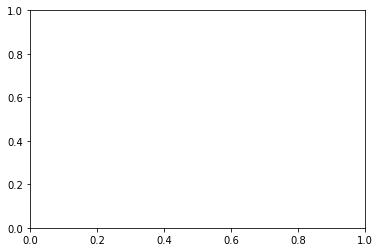

In [89]:
plt.plot(miles.lam_temp, temp_spec*np.median(galaxy)/np.median(temp_spec))
plt.plot(wave, galaxy)

In [87]:
miles.lam_temp, len(miles.lam_temp)

(array([ 1679.94339935,  1680.33026485,  1680.71721944, ...,
        49968.17718772, 49979.68410152, 49991.19366518]),
 14737)

In [ ]:
stars_templates = miles.templates.reshape(miles.templates.shape[0], -1)

In [ ]:
gas_templates, gas_names, line_wave = util.emission_lines(
    miles.ln_lam_temp, lam_range_gal, FWHM_gal)
